In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Milestone 2

In [3]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing csvs saved from milestone 1

In [5]:
car_specs = pd.read_csv('car_specs.csv')

In [6]:
car_sales = pd.read_csv('car_sales.csv')

In [7]:
car_ratings = pd.read_csv('car_ratings.csv')

In [8]:
# Dataframes merging and 
# Feature engineering

In [9]:
print(car_specs)

       Unnamed: 0  id_trim Make     Model    Generation  Year_from  Year_to  \
0               0        1   AC       ACE  1 generation     1993.0   2000.0   
1               1        2   AC       ACE  1 generation     1993.0   2000.0   
2               2        3   AC       ACE  1 generation     1993.0   2000.0   
3               3        4   AC       ACE  1 generation     1993.0   2000.0   
4               4        5   AC       ACE  1 generation     1993.0   2000.0   
...           ...      ...  ...       ...           ...        ...      ...   
70818       70818    70983   ZX  Landmark  1 generation     2007.0   2009.0   
70819       70819    70984   ZX  Landmark  1 generation     2007.0   2009.0   
70820       70820    70985   ZX  Landmark  1 generation     2007.0   2009.0   
70821       70821    70986   ZX  Landmark  1 generation     2007.0   2009.0   
70822       70822    70987   ZX  Landmark  1 generation     2007.0   2009.0   

            Series        Trim  Body_type  ...  fue

In [10]:
# Display column types and null value counts
print(car_specs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70823 entries, 0 to 70822
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           70823 non-null  int64  
 1   id_trim                              70823 non-null  int64  
 2   Make                                 70823 non-null  object 
 3   Model                                70823 non-null  object 
 4   Generation                           70823 non-null  object 
 5   Year_from                            70823 non-null  float64
 6   Year_to                              70823 non-null  float64
 7   Series                               70823 non-null  object 
 8   Trim                                 70823 non-null  object 
 9   Body_type                            70823 non-null  object 
 10  number_of_seats                      70823 non-null  float64
 11  length_mm                   

In [11]:
print(car_sales)

       Unnamed: 0        Car_id        Date Customer Name  Gender  \
0               0  C_CND_000001    1/2/2022     Geraldine    Male   
1               1  C_CND_000002    1/2/2022           Gia    Male   
2               2  C_CND_000003    1/2/2022        Gianna    Male   
3               3  C_CND_000004    1/2/2022       Giselle    Male   
4               4  C_CND_000005    1/2/2022         Grace    Male   
...           ...           ...         ...           ...     ...   
23900       23901  C_CND_023902  12/31/2023        Martin    Male   
23901       23902  C_CND_023903  12/31/2023         Jimmy  Female   
23902       23903  C_CND_023904  12/31/2023          Emma    Male   
23903       23904  C_CND_023905  12/31/2023      Victoire    Male   
23904       23905  C_CND_023906  12/31/2023       Donovan    Male   

       Annual Income                          Dealer_Name    Company  \
0              13500  Buddy Storbeck's Diesel Service Inc       Ford   
1            1480000       

In [12]:
# Rename Make column in car_specs to company
car_specs =car_specs.rename(columns={'Make':'Company'})

In [13]:
print(car_specs)

       Unnamed: 0  id_trim Company     Model    Generation  Year_from  \
0               0        1      AC       ACE  1 generation     1993.0   
1               1        2      AC       ACE  1 generation     1993.0   
2               2        3      AC       ACE  1 generation     1993.0   
3               3        4      AC       ACE  1 generation     1993.0   
4               4        5      AC       ACE  1 generation     1993.0   
...           ...      ...     ...       ...           ...        ...   
70818       70818    70983      ZX  Landmark  1 generation     2007.0   
70819       70819    70984      ZX  Landmark  1 generation     2007.0   
70820       70820    70985      ZX  Landmark  1 generation     2007.0   
70821       70821    70986      ZX  Landmark  1 generation     2007.0   
70822       70822    70987      ZX  Landmark  1 generation     2007.0   

       Year_to       Series        Trim  Body_type  ...  fuel_tank_capacity_l  \
0       2000.0    Cabriolet      3.5 MT  C

In [14]:
# Display column types
print(car_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23905 entries, 0 to 23904
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     23905 non-null  int64 
 1   Car_id         23905 non-null  object
 2   Date           23905 non-null  object
 3   Customer Name  23905 non-null  object
 4   Gender         23905 non-null  object
 5   Annual Income  23905 non-null  int64 
 6   Dealer_Name    23905 non-null  object
 7   Company        23905 non-null  object
 8   Model          23905 non-null  object
 9   Engine         23905 non-null  object
 10  Transmission   23905 non-null  object
 11  Color          23905 non-null  object
 12  Price ($)      23905 non-null  int64 
 13  Dealer_No      23905 non-null  object
 14  Body Style     23905 non-null  object
 15  Phone          23905 non-null  int64 
 16  Dealer_Region  23905 non-null  object
dtypes: int64(4), object(13)
memory usage: 3.1+ MB
None


In [15]:
# standardize the columns in car_specs and car_sales for merge
for i in [car_specs,car_sales]:
    i["Model"]=i["Model"].str.lower().str.strip()
    i["Company"] = i["Company"].str.lower().str.strip()

In [16]:
#Convert Dates in car_sales dataframe
car_sales["Date"] = pd.to_datetime(car_sales["Date"], errors="coerce")

In [17]:
# New column added to get year
car_sales["Sale_Year"] = car_sales["Date"].dt.year

In [18]:
# merge car_sales and car_specs

rowsmerged = []

for idx, sale in car_sales.iterrows():
    sale_company = sale["Company"]
    sale_model = sale["Model"]
    sale_year = sale["Sale_Year"]

    if pd.isna(sale_year):
        continue  

    # Get specs for this company and model
    specsgroup = car_specs[
        (car_specs["Company"] == sale_company) &
        (car_specs["Model"] == sale_model)
    ]

    if specsgroup.empty:
        continue

    # Check for active generation
    activespecs = specsgroup[
        (specsgroup["Year_from"] <= sale_year) &
        (specsgroup["Year_to"] >= sale_year)
    ]

    if not activespecs.empty:
        selectedspec = active_specs.iloc[0]  # take the first active one
    else:
        # Fallback to closest Year_to
        specsgroup = specsgroup.copy()
        specsgroup["Year_to_diff"] = (specsgroup["Year_to"] - sale_year).abs()
        selectedspec = specsgroup.sort_values("Year_to_diff").iloc[0]

    # Drop any duplicate columns
    sale_cleaned = sale.drop(labels=selectedspec.index.intersection(sale.index), errors='ignore')
    merged_row = pd.concat([sale_cleaned, selectedspec])
    rowsmerged.append(merged_row)

# Build the merged DataFrame
merged_df = pd.DataFrame(rowsmerged)

print("Merged shape:", merged_df.shape)
print(merged_df[["Company", "Model", "Date", "Sale_Year", "Year_from", "Year_to"]].head())

Merged shape: (18956, 65)
    Company       Model       Date  Sale_Year  Year_from  Year_to
0      ford  expedition 2022-01-02       2022     2017.0   2020.0
1     dodge     durango 2022-01-02       2022     2013.0   2020.0
2  cadillac    eldorado 2022-01-02       2022     1992.0   2002.0
3    toyota      celica 2022-01-02       2022     2002.0   2006.0
4     acura          tl 2022-01-02       2022     2008.0   2011.0


In [19]:
print(merged_df)

             Car_id       Date Customer Name  Gender  Annual Income  \
0      C_CND_000001 2022-01-02     Geraldine    Male          13500   
1      C_CND_000002 2022-01-02           Gia    Male        1480000   
2      C_CND_000003 2022-01-02        Gianna    Male        1035000   
3      C_CND_000004 2022-01-02       Giselle    Male          13500   
4      C_CND_000005 2022-01-02         Grace    Male        1465000   
...             ...        ...           ...     ...            ...   
18951  C_CND_023900 2023-12-31          Yuna    Male          13500   
18952  C_CND_023901 2023-12-31        Nathan  Female         771000   
18953  C_CND_023902 2023-12-31        Martin    Male          13500   
18954  C_CND_023903 2023-12-31         Jimmy  Female         900000   
18955  C_CND_023905 2023-12-31      Victoire    Male          13500   

                               Dealer_Name                     Engine  \
0      Buddy Storbeck's Diesel Service Inc  DoubleÂ Overhead Camshaft   
1

In [20]:
# standardize car_ratings dataframe
car_ratings["Company"] = car_ratings["Company"].str.lower().str.strip()
car_ratings["Model"] = car_ratings["Model"].str.lower().str.strip()

In [21]:
print(car_ratings)

        Unnamed: 0 Company Model  Year Reviewer_Name         Date  \
0                0   acura   ilx  2013      mahowald   08/12/2012   
1                1   acura   ilx  2013           VIP   07/26/2016   
2                2   acura   ilx  2013     bybchucky   09/14/2013   
3                3   acura   ilx  2013    bayareamom   01/26/2015   
4                4   acura   ilx  2013   Kerry Olson   03/26/2016   
...            ...     ...   ...   ...           ...          ...   
298730      299040   volvo  xc70  2016    FirstVolvo   03/18/2017   
298731      299041   volvo  xc70  2016           Dhp   01/26/2016   
298732      299042   volvo  xc70  2016        Lisa B   05/03/2016   
298733      299043   volvo  xc70  2016         Milan   05/04/2019   
298734      299044   volvo  xc70  2016  Irving Gates   03/05/2019   

                                         Title  Rating  \
0              Getting 43 Mpg on daily commute       5   
1                                New to me ILX       5 

In [22]:
#Create new aggregate features initially by grouping model and company on car_ratings dataframe
ratings_agg = car_ratings.groupby(["Company", "Model"]).agg(
    avg_rating=("Rating", "mean"),
    max_rating=("Rating", "max"),
    min_rating=("Rating", "min"),
    num_reviews=("Rating", "count")
).reset_index()

# also have a set for company alone
ratings_agg_company = car_ratings.groupby("Company").agg(
    comp_avg_rating=("Rating", "mean"),
    comp_max_rating=("Rating", "max"),
    comp_min_rating=("Rating", "min"),
    comp_num_reviews=("Rating", "count")
).reset_index()


In [23]:
# Now merging the 3rd dataframe car_ratings

# First do merge on company and model
merged_full = pd.merge(
    merged_df,
    ratings_agg,
    on=["Company", "Model"],
    how="left"  
)

# Also maintain data for company level as well
merged_full = pd.merge(
    merged_full,
    ratings_agg_company,
    on="Company",
    how="left"
)

In [24]:
# Incase the data is not present for company and model combo impute by company ratings

merged_full["avg_rating"] = merged_full["avg_rating"].fillna(merged_full["comp_avg_rating"])
merged_full["max_rating"] = merged_full["max_rating"].fillna(merged_full["comp_max_rating"])
merged_full["min_rating"] = merged_full["min_rating"].fillna(merged_full["comp_min_rating"])
merged_full["num_reviews"] = merged_full["num_reviews"].fillna(merged_full["comp_num_reviews"])

# drop the company-level columns if no longer needed
merged_full.drop(columns=["comp_avg_rating", "comp_max_rating", "comp_min_rating", "comp_num_reviews"], inplace=True)

In [25]:
print(merged_full)

             Car_id       Date Customer Name  Gender  Annual Income  \
0      C_CND_000001 2022-01-02     Geraldine    Male          13500   
1      C_CND_000002 2022-01-02           Gia    Male        1480000   
2      C_CND_000003 2022-01-02        Gianna    Male        1035000   
3      C_CND_000004 2022-01-02       Giselle    Male          13500   
4      C_CND_000005 2022-01-02         Grace    Male        1465000   
...             ...        ...           ...     ...            ...   
18951  C_CND_023900 2023-12-31          Yuna    Male          13500   
18952  C_CND_023901 2023-12-31        Nathan  Female         771000   
18953  C_CND_023902 2023-12-31        Martin    Male          13500   
18954  C_CND_023903 2023-12-31         Jimmy  Female         900000   
18955  C_CND_023905 2023-12-31      Victoire    Male          13500   

                               Dealer_Name                     Engine  \
0      Buddy Storbeck's Diesel Service Inc  DoubleÂ Overhead Camshaft   
1

In [26]:
car_full = merged_full.copy()

In [27]:
# Has reviews to get boolean reviews present or not

car_full["has_reviews"] = car_full["num_reviews"].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)

In [28]:
print(car_full)

             Car_id       Date Customer Name  Gender  Annual Income  \
0      C_CND_000001 2022-01-02     Geraldine    Male          13500   
1      C_CND_000002 2022-01-02           Gia    Male        1480000   
2      C_CND_000003 2022-01-02        Gianna    Male        1035000   
3      C_CND_000004 2022-01-02       Giselle    Male          13500   
4      C_CND_000005 2022-01-02         Grace    Male        1465000   
...             ...        ...           ...     ...            ...   
18951  C_CND_023900 2023-12-31          Yuna    Male          13500   
18952  C_CND_023901 2023-12-31        Nathan  Female         771000   
18953  C_CND_023902 2023-12-31        Martin    Male          13500   
18954  C_CND_023903 2023-12-31         Jimmy  Female         900000   
18955  C_CND_023905 2023-12-31      Victoire    Male          13500   

                               Dealer_Name                     Engine  \
0      Buddy Storbeck's Diesel Service Inc  DoubleÂ Overhead Camshaft   
1

In [29]:
print(car_full.isnull().sum())

Car_id             0
Date               0
Customer Name      0
Gender             0
Annual Income      0
                ... 
avg_rating       586
max_rating       586
min_rating       586
num_reviews      586
has_reviews        0
Length: 70, dtype: int64


In [30]:
car_full = car_full[car_full['has_reviews'] != 0].reset_index(drop=True)

In [31]:
car_full.to_csv('FullyMerged.csv')

In [32]:
# New features added

In [33]:
car_full["popularity_score"] = car_full["avg_rating"] * np.log1p(car_full["num_reviews"])

In [34]:
car_full["fuel_eff_score"] = (car_full["city_fuel_per_100km_l"].astype(float) + 
                              car_full["highway_fuel_per_100km_l"].astype(float)) / 2

In [35]:
car_full["avg_track_mm"] = (car_full["front_track_mm"] + car_full["rear_track_mm"]) / 2

In [36]:
car_full["displacement_per_cylinder"] = (car_full["capacity_cm3"])/car_full["number_of_cylinders"]

In [37]:
car_full["power_to_weight"] = car_full["engine_hp"] / car_full["curb_weight_kg"]

In [38]:
car_full["volume_mm3"] = (
    car_full["length_mm"] *
    car_full["width_mm"] *
    car_full["height_mm"]
)

In [39]:
# Create a joint target variable
car_full["company_model"] = car_full["Company"] + "_" + car_full["Model"]

# Check the number of unique classes
print("Unique classes:", car_full["company_model"].nunique())


Unique classes: 120


In [40]:
# Encoding and Feature Selection

In [41]:
car_full_analysis = car_full.copy()

In [42]:
dropcolumns = ["Customer Name","Car_id","Phone", "Dealer_Name", "id_trim","Trim","Dealer_No ","Body Style","Date","Company","Model"]
car_full_analysis = car_full_analysis.drop(columns=dropcolumns)

In [43]:
# Analyzing unique values to decide the encoding type for categorical data
categorical_cols = car_full_analysis.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    unique_count = car_full_analysis[col].nunique()
    print(f"{col}: {unique_count} unique values")

Gender: 2 unique values
Engine: 2 unique values
Transmission: 2 unique values
Color: 3 unique values
Dealer_Region: 7 unique values
Generation: 41 unique values
Series: 40 unique values
Body_type: 9 unique values
injection_type: 6 unique values
cylinder_layout: 4 unique values
engine_type: 3 unique values
drive_wheels: 5 unique values
transmission: 4 unique values
back_suspension: 43 unique values
rear_brakes: 3 unique values
front_brakes: 3 unique values
front_suspension: 29 unique values
company_model: 120 unique values


In [44]:
from sklearn.preprocessing import LabelEncoder

# Take categorical columns and exclude company_model target columns
categorical_cols = car_full_analysis.select_dtypes(include=['object']).columns.tolist()
exclude_cols = ["company_model"]
categorical_cols = [col for col in categorical_cols if col not in exclude_cols]

# Label encoding
le = LabelEncoder()
for col in categorical_cols:
    car_full_analysis[col] = le.fit_transform(car_full_analysis[col].astype(str))

print("Encoded Categorical Columns:", categorical_cols)


Encoded Categorical Columns: ['Gender', 'Engine', 'Transmission', 'Color', 'Dealer_Region', 'Generation', 'Series', 'Body_type', 'injection_type', 'cylinder_layout', 'engine_type', 'drive_wheels', 'transmission', 'back_suspension', 'rear_brakes', 'front_brakes', 'front_suspension']


In [45]:
from sklearn.preprocessing import MinMaxScaler

# Take numeric columns excluding identifiers
numeric_cols = car_full_analysis.select_dtypes(include=[float, int]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Apply log1p transformation
car_full_analysis[numeric_cols] = car_full_analysis[numeric_cols].apply(lambda col: np.log1p(col))

# Apply MinMax scaling
scaler = MinMaxScaler()


car_full_analysis[numeric_cols] = scaler.fit_transform(car_full_analysis[numeric_cols])


In [46]:
car_full_analysis

,Gender,Annual Income,Engine,Transmission,Color,Price ($),Dealer_Region,Sale_Year,Unnamed: 0,Generation,...,min_rating,num_reviews,has_reviews,popularity_score,fuel_eff_score,avg_track_mm,displacement_per_cylinder,power_to_weight,volume_mm3,company_model
0,1.0,0.000000,0.0,0.0,0.00000,0.720326,0.827087,0.0,0.844266,0.669142,...,0.500000,0.589364,0.0,0.720442,0.770225,0.686668,0.586806,0.298518,0.846851,ford_expedition
1,1.0,0.698869,0.0,0.0,0.00000,0.646853,0.000000,0.0,0.830570,0.645711,...,0.500000,0.610530,0.0,0.748449,0.876712,0.500426,0.806149,0.289332,0.611861,dodge_durango
2,1.0,0.645656,1.0,1.0,1.00000,0.765275,0.564575,0.0,0.707269,0.373305,...,0.500000,0.215510,0.0,0.425550,0.418744,0.232419,0.563085,0.325477,0.330714,cadillac_eldorado
3,1.0,0.000000,1.0,1.0,0.63093,0.575321,0.920782,0.0,0.978296,0.806698,...,0.500000,0.478125,0.0,0.702183,0.495754,0.232419,0.290858,0.319880,0.012239,toyota_celica
4,1.0,0.697354,0.0,0.0,1.00000,0.706406,0.712414,0.0,0.140623,0.669142,...,0.500000,0.650995,0.0,0.812110,0.675963,0.473959,0.578654,0.265805,0.335340,acura_tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18365,1.0,0.000000,0.0,0.0,0.63093,0.923896,0.000000,1.0,0.701073,0.591674,...,0.500000,0.771158,0.0,0.851768,0.529745,0.469529,0.331428,0.150428,0.408350,buick_park avenue
18366,0.0,0.601842,0.0,0.0,1.00000,0.646853,0.564575,1.0,0.840683,0.295837,...,0.500000,0.188153,0.0,0.233257,0.429364,0.232419,0.406187,0.135206,0.150683,ford_contour
18367,1.0,0.000000,1.0,1.0,1.00000,0.539213,0.920782,1.0,0.954579,0.591674,...,0.500000,0.042091,0.0,0.000000,0.616539,0.473959,0.402373,0.086566,0.566382,plymouth_voyager
18368,0.0,0.624861,0.0,0.0,0.00000,0.606599,0.827087,1.0,0.784748,0.000000,...,0.500000,0.336236,0.0,0.506859,0.470742,0.132743,0.289593,0.160964,0.042762,chevrolet_prizm


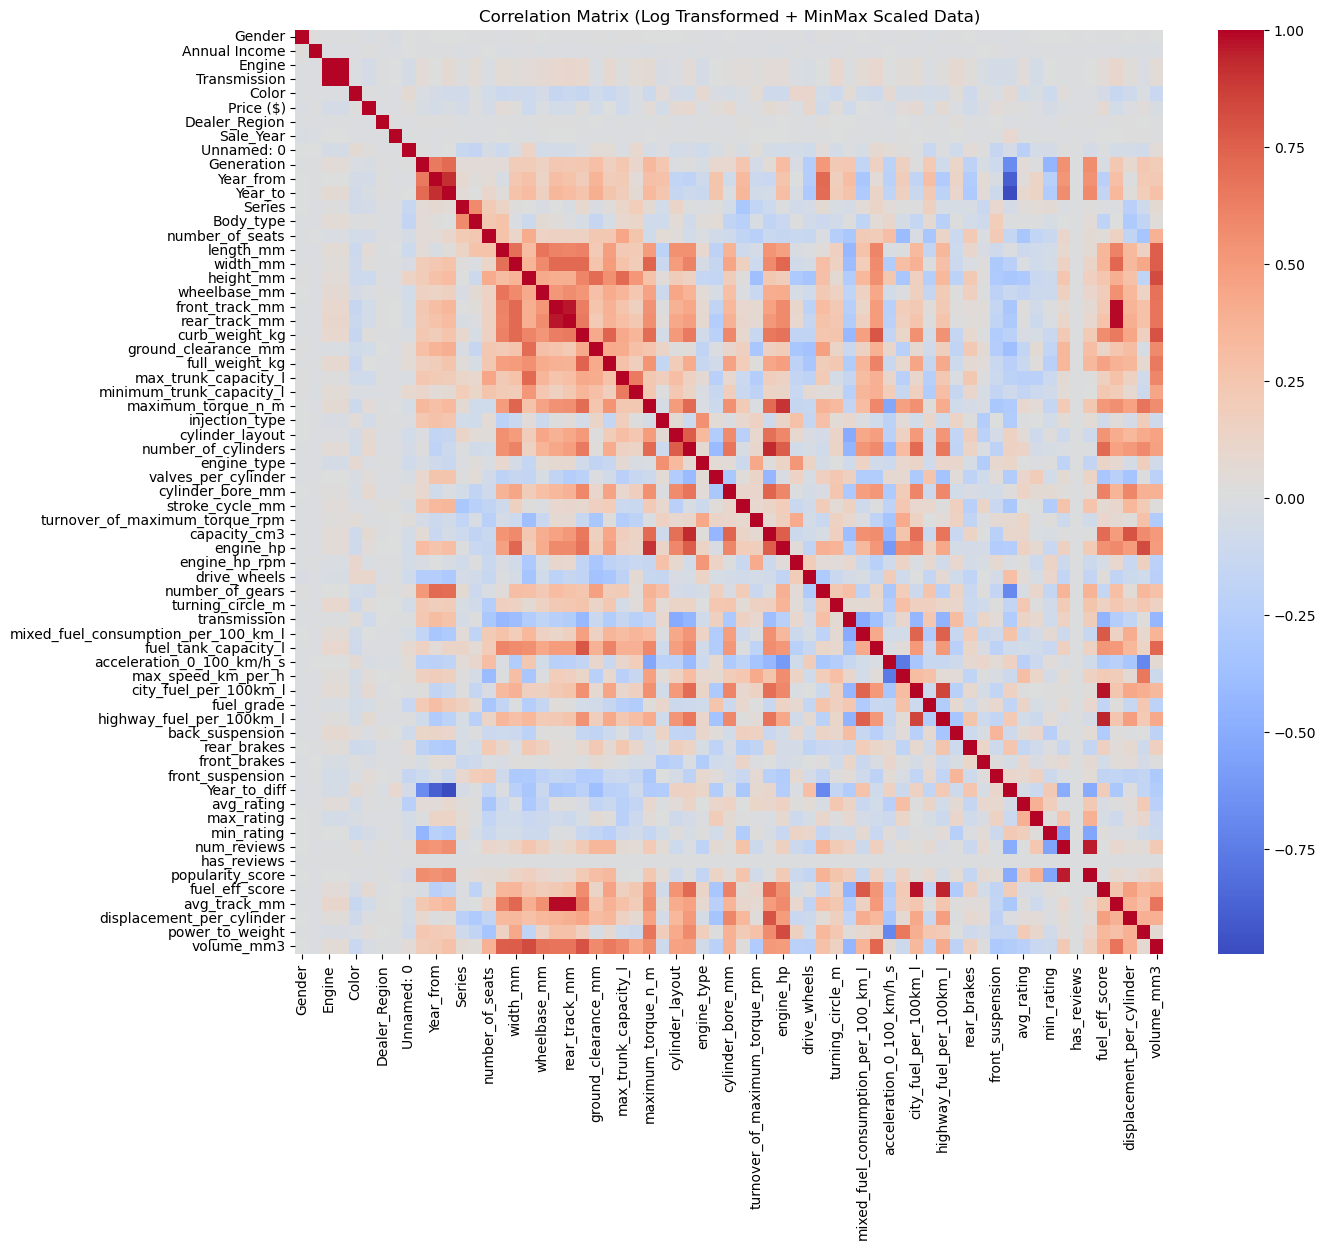

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop identifier columns
df_corr = car_full_analysis.drop(columns=exclude_cols)
corr_matrix = df_corr.corr().fillna(0)

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix (Log Transformed + MinMax Scaled Data)")
plt.show()


In [48]:
# Set correlation threshold
threshold = 0.8

# Get the correlation matrix
corr_matrix = car_full_analysis.corr(numeric_only=True)

# Find highly correlated pairs
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr.append({
                "Feature 1": corr_matrix.columns[i],
                "Correlation": corr_value,
                "Feature 2": corr_matrix.columns[j]
                
            })

# Convert to DataFrame
high_corr_df = pd.DataFrame(high_corr).sort_values(by="Correlation", ascending=False)

# Results
print(f"\nHighly Correlated Pairs (|correlation| > {threshold}):")
print(high_corr_df)



Highly Correlated Pairs (|correlation| > 0.8):
                   Feature 1  Correlation                 Feature 2
0                     Engine     1.000000              Transmission
7              rear_track_mm     0.991648              avg_track_mm
6             front_track_mm     0.990118              avg_track_mm
13     city_fuel_per_100km_l     0.976215            fuel_eff_score
5             front_track_mm     0.963764             rear_track_mm
15               num_reviews     0.956753          popularity_score
14  highway_fuel_per_100km_l     0.944854            fuel_eff_score
10       number_of_cylinders     0.926164              capacity_cm3
1                  Year_from     0.915151                   Year_to
9         maximum_torque_n_m     0.900108                 engine_hp
12     city_fuel_per_100km_l     0.851691  highway_fuel_per_100km_l
4                  height_mm     0.824555                volume_mm3
11                 engine_hp     0.823648           power_to_weight


In [49]:
# Chi-Square Test 

from scipy.stats import chi2_contingency
import pandas as pd

print("\nChi-Square Test Results (Categorical Features vs company_model):")

chi_square_results = []

for col in categorical_cols:
    contingency_table = pd.crosstab(car_full_analysis[col], car_full_analysis["company_model"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append((col, chi2, p))

# Create results DataFrame
chi_square_df = pd.DataFrame(chi_square_results, columns=["Feature", "Chi2 Statistic", "P-Value"])
chi_square_df.sort_values(by="P-Value", inplace=True)

print("\nAll Chi-Square Test Results:")
print(chi_square_df)



Chi-Square Test Results (Categorical Features vs company_model):

All Chi-Square Test Results:
             Feature  Chi2 Statistic   P-Value
8     injection_type    91850.000000  0.000000
14       rear_brakes    36740.000000  0.000000
13   back_suspension   771540.000000  0.000000
12      transmission    55110.000000  0.000000
11      drive_wheels    73480.000000  0.000000
10       engine_type    36740.000000  0.000000
9    cylinder_layout    55110.000000  0.000000
15      front_brakes    36740.000000  0.000000
16  front_suspension   514360.000000  0.000000
6             Series   716430.000000  0.000000
5         Generation   734800.000000  0.000000
3              Color     7102.810845  0.000000
2       Transmission     6058.326584  0.000000
1             Engine     6058.326584  0.000000
7          Body_type   146960.000000  0.000000
4      Dealer_Region      857.671106  0.000165
0             Gender      125.771603  0.317783


In [50]:
print("\nSignificant Categorical Features (p < 0.05):")
significant_features = chi_square_df[chi_square_df["P-Value"] < 0.05]
print(significant_features)


Significant Categorical Features (p < 0.05):
             Feature  Chi2 Statistic   P-Value
8     injection_type    91850.000000  0.000000
14       rear_brakes    36740.000000  0.000000
13   back_suspension   771540.000000  0.000000
12      transmission    55110.000000  0.000000
11      drive_wheels    73480.000000  0.000000
10       engine_type    36740.000000  0.000000
9    cylinder_layout    55110.000000  0.000000
15      front_brakes    36740.000000  0.000000
16  front_suspension   514360.000000  0.000000
6             Series   716430.000000  0.000000
5         Generation   734800.000000  0.000000
3              Color     7102.810845  0.000000
2       Transmission     6058.326584  0.000000
1             Engine     6058.326584  0.000000
7          Body_type   146960.000000  0.000000
4      Dealer_Region      857.671106  0.000165


In [51]:
# Based on the correlation, chi square test and new features

columns_to_drop = ["Engine","maximum_torque_n_m","engine_hp","rear_track_mm","front_track_mm","num_reviews","curb_weight_kg","Year_from","length_mm","width_mm","height_mm","Year_to","Year_to_diff","maximum_torque_n_m","Dealer_Region","number_of_cylinders","capacity_cm3","city_fuel_per_100km_l","highway_fuel_per_100km_l","Gender"]
car_full_analysis = car_full_analysis.drop(columns=columns_to_drop)

In [52]:
car_full_analysis

,Annual Income,Transmission,Color,Price ($),Sale_Year,Unnamed: 0,Generation,Series,Body_type,number_of_seats,...,max_rating,min_rating,has_reviews,popularity_score,fuel_eff_score,avg_track_mm,displacement_per_cylinder,power_to_weight,volume_mm3,company_model
0,0.000000,0.0,0.00000,0.720326,0.0,0.844266,0.669142,0.872589,0.500000,1.000000,...,1.0,0.500000,0.0,0.720442,0.770225,0.686668,0.586806,0.298518,0.846851,ford_expedition
1,0.698869,0.0,0.00000,0.646853,0.0,0.830570,0.645711,0.872589,0.500000,0.863859,...,1.0,0.500000,0.0,0.748449,0.876712,0.500426,0.806149,0.289332,0.611861,dodge_durango
2,0.645656,1.0,1.00000,0.765275,0.0,0.707269,0.373305,0.563705,0.885622,0.706695,...,1.0,0.500000,0.0,0.425550,0.418744,0.232419,0.563085,0.325477,0.330714,cadillac_eldorado
3,0.000000,1.0,0.63093,0.575321,0.0,0.978296,0.806698,0.751607,0.885622,0.520810,...,1.0,0.500000,0.0,0.702183,0.495754,0.232419,0.290858,0.319880,0.012239,toyota_celica
4,0.697354,0.0,1.00000,0.706406,0.0,0.140623,0.669142,0.912823,0.885622,0.706695,...,1.0,0.500000,0.0,0.812110,0.675963,0.473959,0.578654,0.265805,0.335340,acura_tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18365,0.000000,0.0,0.63093,0.923896,1.0,0.701073,0.591674,0.912823,0.885622,0.706695,...,1.0,0.500000,0.0,0.851768,0.529745,0.469529,0.331428,0.150428,0.408350,buick_park avenue
18366,0.601842,0.0,1.00000,0.646853,1.0,0.840683,0.295837,0.912823,0.885622,0.706695,...,1.0,0.500000,0.0,0.233257,0.429364,0.232419,0.406187,0.135206,0.150683,ford_contour
18367,0.000000,1.0,1.00000,0.539213,1.0,0.954579,0.591674,0.715409,0.732487,1.000000,...,0.0,0.500000,0.0,0.000000,0.616539,0.473959,0.402373,0.086566,0.566382,plymouth_voyager
18368,0.624861,0.0,0.00000,0.606599,1.0,0.784748,0.000000,0.912823,0.885622,0.706695,...,1.0,0.500000,0.0,0.506859,0.470742,0.132743,0.289593,0.160964,0.042762,chevrolet_prizm


In [53]:
car_full_analysis.to_csv('car_full_after.csv')

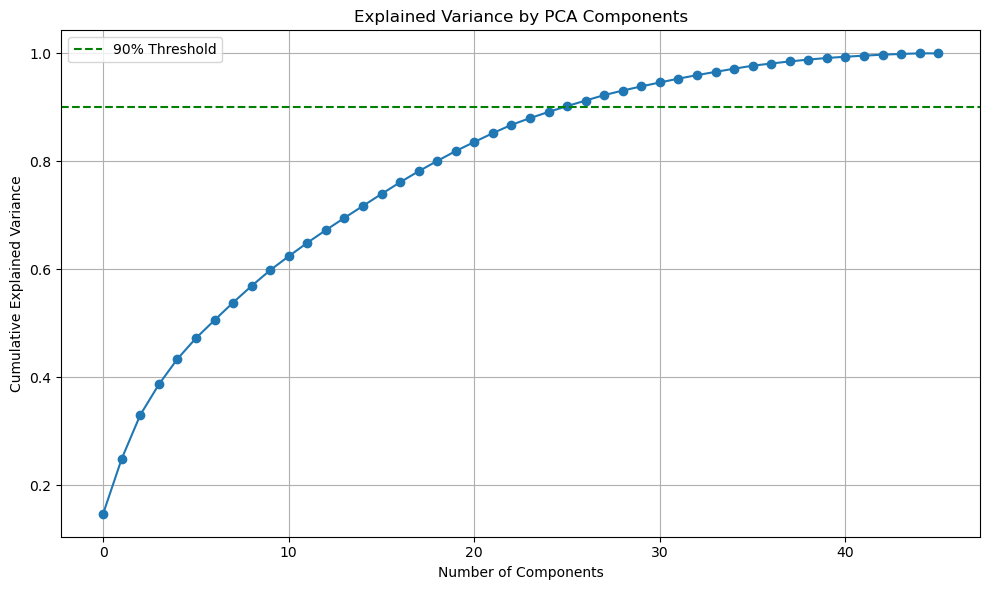

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define target & feature columns
targetcol = 'company_model'
featurecols = [
    'Annual Income', 'Transmission', 'Color', 'Price ($)', 'Sale_Year', 'Unnamed: 0', 'Generation', 'Series', 
    'Body_type', 'number_of_seats', 'wheelbase_mm', 'ground_clearance_mm', 'full_weight_kg', 
    'max_trunk_capacity_l', 'minimum_trunk_capacity_l', 'injection_type', 'cylinder_layout', 
    'engine_type', 'valves_per_cylinder', 'cylinder_bore_mm', 'stroke_cycle_mm', 'turnover_of_maximum_torque_rpm', 
    'engine_hp_rpm', 'drive_wheels', 'number_of_gears', 'turning_circle_m', 'transmission', 
    'mixed_fuel_consumption_per_100_km_l', 'fuel_tank_capacity_l', 'acceleration_0_100_km/h_s', 
    'max_speed_km_per_h', 'fuel_grade', 'back_suspension', 'rear_brakes', 'front_brakes', 
    'front_suspension', 'avg_rating', 'max_rating', 'min_rating', 'has_reviews', 'power_to_weight',
    'popularity_score', 'fuel_eff_score', 'avg_track_mm', 'displacement_per_cylinder', 'volume_mm3'
]

# Standardize features
X = car_full_analysis[featurecols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [109]:
# Get feature contributions to each component
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(featurecols))], index=featurecols)

# Sum of absolute contributions across top N components
top_n = 25
featureimportance = loadings.iloc[:, :top_n].abs().sum(axis=1).sort_values(ascending=False)

# Show top and bottom contributing features
print("\n Top contributing features:")
print(featureimportance.head(10))

print("\n Least contributing features:")
print(featureimportance.tail(15))



 Top contributing features:
turning_circle_m    3.835363
Color               3.761606
Transmission        3.472540
Unnamed: 0          3.463166
max_rating          3.431688
Price ($)           3.422576
front_brakes        3.331918
fuel_grade          3.281059
back_suspension     3.276594
rear_brakes         3.241994
dtype: float64

 Least contributing features:
mixed_fuel_consumption_per_100_km_l    2.479308e+00
acceleration_0_100_km/h_s              2.466689e+00
number_of_gears                        2.434648e+00
cylinder_layout                        2.372210e+00
max_speed_km_per_h                     2.357670e+00
Annual Income                          2.353878e+00
ground_clearance_mm                    2.330247e+00
Sale_Year                              2.280913e+00
engine_type                            2.243004e+00
power_to_weight                        2.239770e+00
fuel_eff_score                         2.221893e+00
cylinder_bore_mm                       2.144911e+00
fuel_tank_c

In [111]:
# Removing few more features after PCA
columns_to_drop = ["acceleration_0_100_km/h_s","number_of_gears","has_reviews","ground_clearance_mm","cylinder_bore_mm","mixed_fuel_consumption_per_100_km_l","cylinder_layout","minimum_trunk_capacity_l"]
car_full_analysis = car_full_analysis.drop(columns=columns_to_drop)

In [113]:
car_full_analysis

,Annual Income,Transmission,Color,Price ($),Sale_Year,Unnamed: 0,Generation,Series,Body_type,number_of_seats,...,avg_rating,max_rating,min_rating,popularity_score,fuel_eff_score,avg_track_mm,displacement_per_cylinder,power_to_weight,volume_mm3,company_model
0,0.000000,0.0,0.00000,0.720326,0.0,0.844266,0.669142,0.872589,0.500000,1.000000,...,0.535619,1.0,0.500000,0.720442,0.770225,0.686668,0.586806,0.298518,0.846851,ford_expedition
1,0.698869,0.0,0.00000,0.646853,0.0,0.830570,0.645711,0.872589,0.500000,0.863859,...,0.587911,1.0,0.500000,0.748449,0.876712,0.500426,0.806149,0.289332,0.611861,dodge_durango
2,0.645656,1.0,1.00000,0.765275,0.0,0.707269,0.373305,0.563705,0.885622,0.706695,...,0.719192,1.0,0.500000,0.425550,0.418744,0.232419,0.563085,0.325477,0.330714,cadillac_eldorado
3,0.000000,1.0,0.63093,0.575321,0.0,0.978296,0.806698,0.751607,0.885622,0.520810,...,0.797864,1.0,0.500000,0.702183,0.495754,0.232419,0.290858,0.319880,0.012239,toyota_celica
4,0.697354,0.0,1.00000,0.706406,0.0,0.140623,0.669142,0.912823,0.885622,0.706695,...,0.732143,1.0,0.500000,0.812110,0.675963,0.473959,0.578654,0.265805,0.335340,acura_tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18365,0.000000,0.0,0.63093,0.923896,1.0,0.701073,0.591674,0.912823,0.885622,0.706695,...,0.591825,1.0,0.500000,0.851768,0.529745,0.469529,0.331428,0.150428,0.408350,buick_park avenue
18366,0.601842,0.0,1.00000,0.646853,1.0,0.840683,0.295837,0.912823,0.885622,0.706695,...,0.080176,1.0,0.500000,0.233257,0.429364,0.232419,0.406187,0.135206,0.150683,ford_contour
18367,0.000000,1.0,1.00000,0.539213,1.0,0.954579,0.591674,0.715409,0.732487,1.000000,...,0.001894,0.0,0.500000,0.000000,0.616539,0.473959,0.402373,0.086566,0.566382,plymouth_voyager
18368,0.624861,0.0,0.00000,0.606599,1.0,0.784748,0.000000,0.912823,0.885622,0.706695,...,0.519069,1.0,0.500000,0.506859,0.470742,0.132743,0.289593,0.160964,0.042762,chevrolet_prizm


In [115]:
car_full_analysis.to_csv('car_full_analysis_final.csv')

In [117]:
from sklearn.model_selection import train_test_split

# Separate features and target variables
X = car_full_analysis.drop(columns=['company_model'])  # Features
y = car_full_analysis['company_model']  # Target (Company_model)

# Split the data into training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 12859
Test set size: 5511


In [119]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

In [121]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) + 1 

# Normalize feature values
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [123]:
# Supervised Learning

In [125]:
# Logistic regression
lrmodel = LogisticRegression(max_iter=1000, random_state=42)

# Train model
lrmodel.fit(X_train, y_train)

# Predict output
lrpreds = lrmodel.predict(X_test)

In [126]:
# Random Forest Classifier
rfmodel = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

#Train model
rfmodel.fit(X_train, y_train)

# Predict output
rfpreds = rfmodel.predict(X_test)

In [127]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=8)

# Train the model
knnmodel.fit(X_train, y_train)

# Make predictions
knnpreds = knnmodel.predict(X_test)

In [131]:
# Model evaluation function to compare supervised learnings
def evaluate_model(y_true, y_pred, model, modelname):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"{modelname} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")



In [133]:
# Evaluate each model
evaluate_model(y_test, lrpreds, lrmodel, "Logistic Regression")
evaluate_model(y_test, rfpreds, rfmodel, "Random Forest")
evaluate_model(y_test, knnpreds, knnmodel, "KNN")

Logistic Regression - Accuracy: 0.9924, Precision: 0.9897, Recall: 0.9924, F1-score: 0.9904
Random Forest - Accuracy: 0.9151, Precision: 0.8760, Recall: 0.9151, F1-score: 0.8895
KNN - Accuracy: 0.9886, Precision: 0.9894, Recall: 0.9886, F1-score: 0.9885


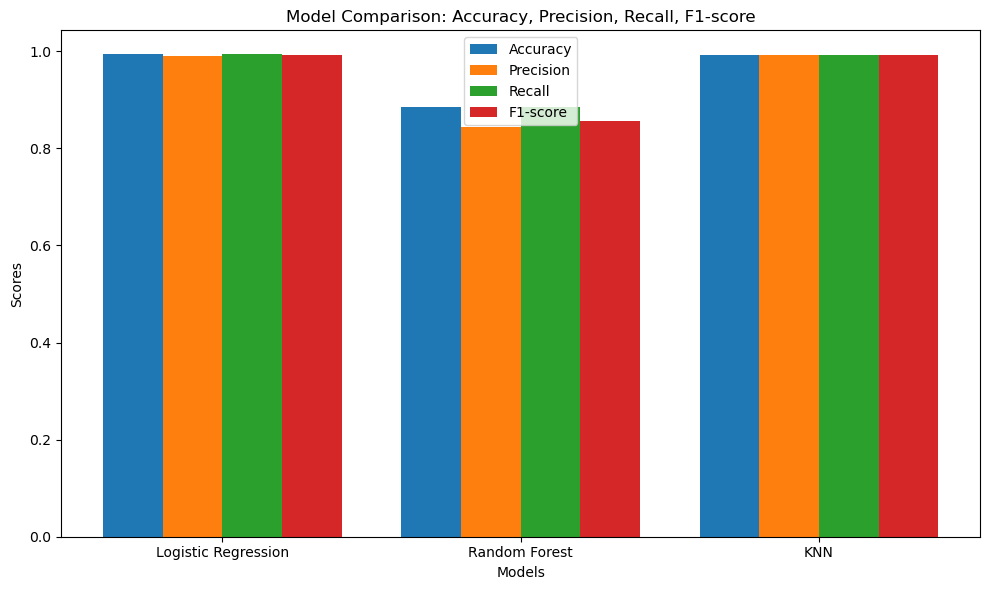

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Model evaluation metrics
models = ['Logistic Regression', 'Random Forest', 'KNN']

accuracy = [0.9936, 0.8853, 0.9926]
precision = [0.9908, 0.8451, 0.9925]
recall = [0.9936, 0.8853, 0.9926]
f1 = [0.9917, 0.8568, 0.9920]

# figures
x = np.arange(len(models)) 
width = 0.2 

# Plot the bars
fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5 * width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5 * width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5 * width, f1, width, label='F1-score')

# Labels
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Accuracy, Precision, Recall, F1-score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [137]:
# ROC curve

In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split


In [141]:
# Binarize the output for ROC
from sklearn.preprocessing import LabelEncoder

n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))


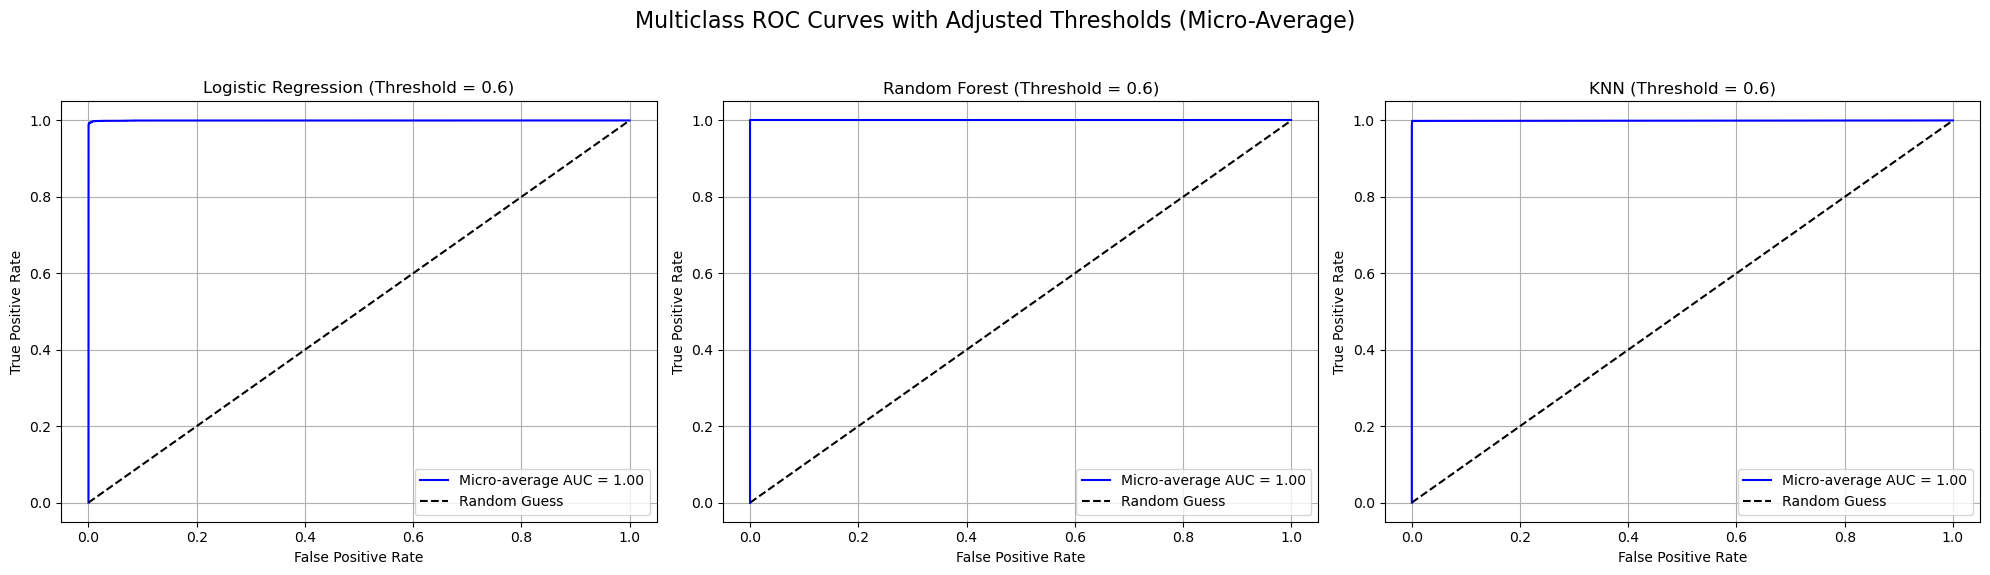

In [238]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
import numpy as np
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Binarize the test labels (already done)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
n_classes = y_test_bin.shape[1]

# Define models
models = {
    'Logistic Regression': lrmodel,
    'Random Forest': rfmodel,
    'KNN': knnmodel
}

# Create subplots for each model
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
threshold = 0.6  # You can still experiment with this for predictions

# ROC for each model
for ax, (name, model) in zip(axes, models.items()):
   
    ovr = OneVsRestClassifier(model)
    ovr.fit(X_train, y_train_bin)
    y_score = ovr.predict_proba(X_test)

    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Micro-average ROC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC
    ax.plot(fpr["micro"], tpr["micro"],
            label=f'Micro-average AUC = {roc_auc["micro"]:.2f}', color='blue')

    ax.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    ax.set_title(f'{name} (Threshold = {threshold})')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid(True)

plt.suptitle('Multiclass ROC Curves with Adjusted Thresholds (Micro-Average)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [145]:
# Unsupervised learning 

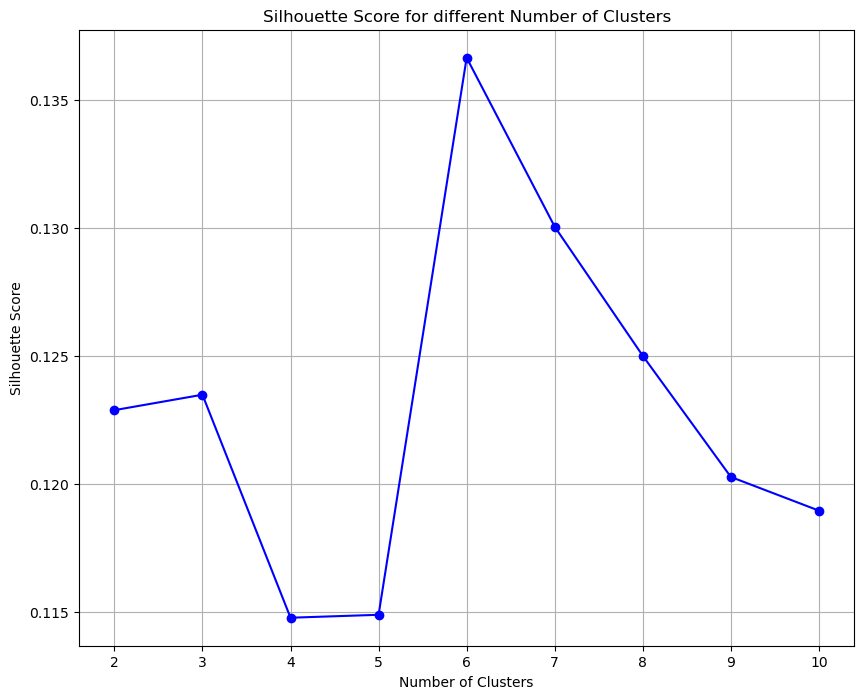

Optimal number of clusters: 6


In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# The range of clusters to test
k_range = range(2, 11)

# scores array
silhouette_scores = []

# Loop through the number of clusters and fit KMeans
for k in k_range:
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans.fit(X)  
    
    # Calculate the silhouette score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    
# Plot the silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(10, 8))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Get the optimal number of clusters (k)
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")


In [240]:
# K means 

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [244]:
# 'company_model' as the target column
X = car_full_analysis.drop(columns=['company_model'])  # Features
y = car_full_analysis['company_model']  # Target


In [246]:
# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [248]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

In [250]:
# Train the model
lrmodel = LogisticRegression(max_iter=2000, random_state=42)
lrmodel.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [251]:
# Apply KMeans to all data
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
car_full_analysis['Cluster'] = kmeans.fit_predict(X)

In [252]:
# Predict using Logistic Regression
lrpreds = lrmodel.predict(X_test)

In [253]:
def get_cluster_for_predicted_car(predicted_label, car_data):
    company_model = le.inverse_transform([predicted_label])[0]
    predicted_car_row = car_data[car_data['company_model'] == company_model]
    predicted_car_cluster = predicted_car_row['Cluster'].values[0]
    return predicted_car_cluster, company_model


In [254]:
def recommend_similar_cars(predicted_label, car_data, top_n=5):
    predicted_cluster, company_model = get_cluster_for_predicted_car(predicted_label, car_data)
    similar_cars = car_data[car_data['Cluster'] == predicted_cluster]

    # similar cars based on the features
    similar_cars_scaled = similar_cars[['popularity_score', 'fuel_eff_score','Price ($)','Annual Income']]
    
    similar_cars = similar_cars.copy()
    similar_cars['score'] = similar_cars_scaled.sum(axis=1)
    
    recommended_cars = similar_cars.sort_values(by='score', ascending=False)
    return recommended_cars[['company_model','score']].drop_duplicates(subset='company_model').head(top_n), company_model


In [255]:
recommended_cars, company_model = recommend_similar_cars(lrpreds[0], car_full_analysis)

In [262]:
print(f"Recommended cars based on predicted company_model: - {company_model} ")
print("using Kmeans clustering")
print(recommended_cars)
print(f"Predicted car: {le.inverse_transform([lrpreds[0]])[0]}")

Recommended cars based on predicted company_model: - mercury_grand marquis 
using Kmeans clustering
            company_model     score
2136    buick_park avenue  3.164693
964   ford_crown victoria  3.146330
3425  lincoln_continental  3.099188
1888  mercury_mountaineer  3.046633
4547     lincoln_town car  3.020719
Predicted car: mercury_grand marquis


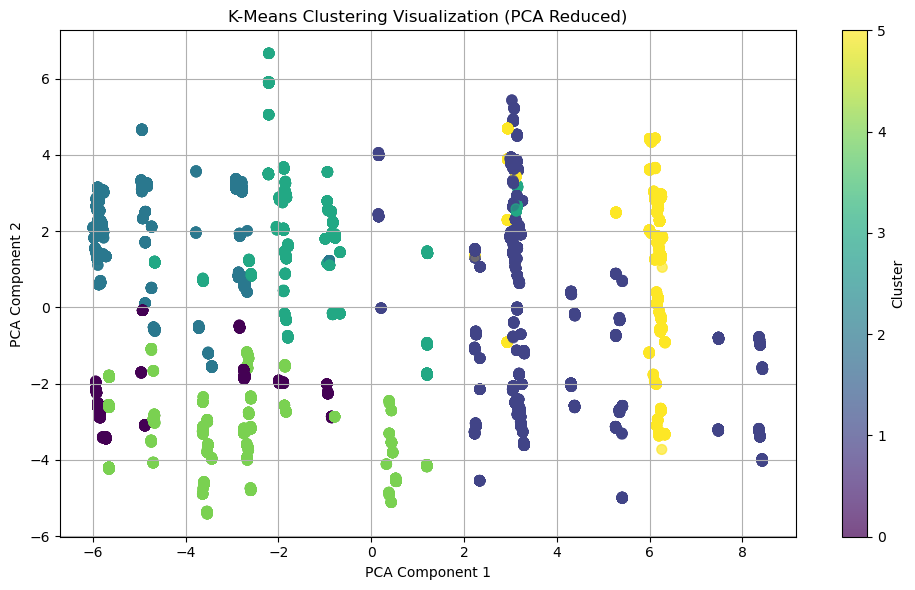

In [264]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA components to the dataframe
car_full_analysis['PCA1'] = X_pca[:, 0]
car_full_analysis['PCA2'] = X_pca[:, 1]

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    car_full_analysis['PCA1'],
    car_full_analysis['PCA2'],
    c=car_full_analysis['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Cluster')
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [300]:
#  Agglomerative clustering

In [302]:
# Predict labels using the trained logistic regression model
lrpreds = lrmodel.predict(X_test)

# using X 
X_for_clustering = X.copy()


In [304]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with "6" from silhoutte method
agglo = AgglomerativeClustering(n_clusters=6)
car_full_analysis['Agglo_Cluster'] = agglo.fit_predict(X_for_clustering)

In [305]:
def get_cluster_for_predicted_car_agg(predicted_label, car_data):
    company_model = le.inverse_transform([predicted_label])[0]
    predicted_car_row = car_data[car_data['company_model'] == company_model]
    predicted_car_cluster = predicted_car_row['Agglo_Cluster'].values[0]
    return predicted_car_cluster, company_model


In [306]:
def recommend_similar_cars_agg(predicted_label, car_data, top_n=5):
    predicted_cluster, company_model = get_cluster_for_predicted_car_agg(predicted_label, car_data)
    similar_cars = car_data[car_data['Agglo_Cluster'] == predicted_cluster]

    # similar cars based on the features
    similar_cars_scaled = similar_cars[['popularity_score', 'fuel_eff_score','Price ($)']]
    
    similar_cars = similar_cars.copy()
    similar_cars['score'] = similar_cars_scaled.sum(axis=1)
    
    recommended_cars_agg = similar_cars.sort_values(by='score', ascending=False)
    return recommended_cars_agg[['company_model','score']].drop_duplicates(subset='company_model').head(top_n), company_model


In [307]:
recommended_cars_agg, company_model = recommend_similar_cars_agg(lrpreds[2347], car_full_analysis)

In [308]:
print(f"Recommended cars based on predicted company_model:  {company_model} ")
print("using agglomerative clustering")
print(recommended_cars_agg)
print(f"Predicted car: {le.inverse_transform([lrpreds[2347]])[0]}")

Recommended cars based on predicted company_model:  volvo_c70 
using agglomerative clustering
               company_model     score
2970   chevrolet_monte carlo  2.793575
1762             dodge_viper  2.432922
16270       chevrolet_camaro  2.340590
3776               volvo_c70  2.229040
16918          honda_odyssey  2.219272
Predicted car: volvo_c70


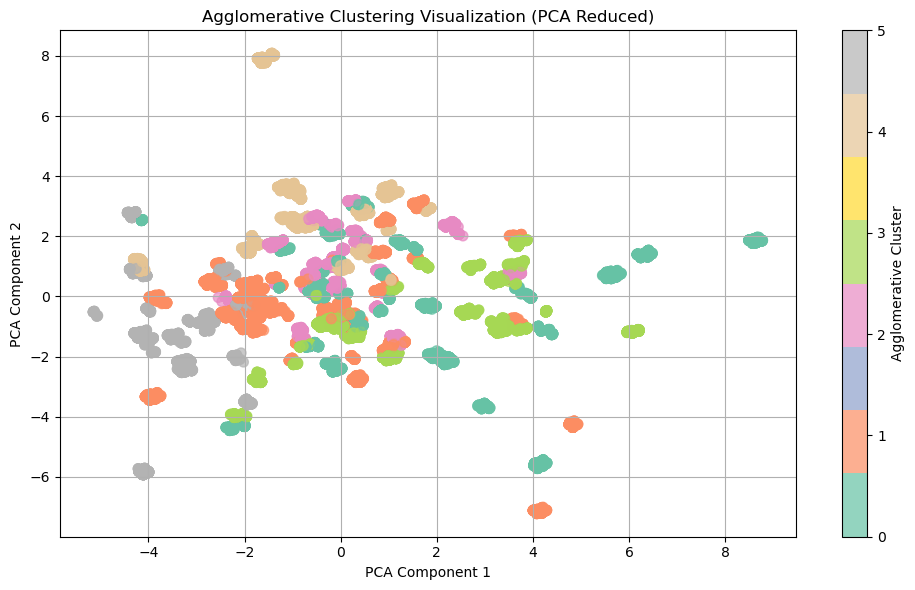

In [309]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_clustering)

# Step 2: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Store PCA values for plotting
car_full_analysis['PCA1'] = X_pca[:, 0]
car_full_analysis['PCA2'] = X_pca[:, 1]

# Step 4: Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    car_full_analysis['PCA1'],
    car_full_analysis['PCA2'],
    c=car_full_analysis['Agglo_Cluster'],
    cmap='Set2',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='Agglomerative Cluster')
plt.title("Agglomerative Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

    

In [310]:
# GMM clustering

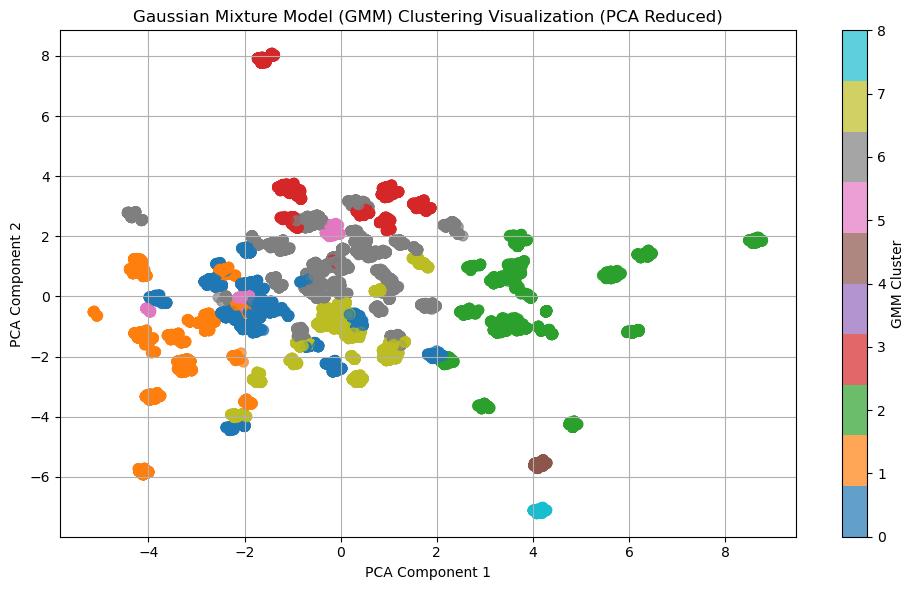

In [311]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_clustering)

# Step 2: Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=9, random_state=42)
car_full_analysis['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# Step 3: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
car_full_analysis['PCA1'] = X_pca[:, 0]
car_full_analysis['PCA2'] = X_pca[:, 1]

# Step 4: Plot the GMM clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    car_full_analysis['PCA1'],
    car_full_analysis['PCA2'],
    c=car_full_analysis['GMM_Cluster'],
    cmap='tab10',
    s=50,
    alpha=0.7
)

plt.colorbar(scatter, label='GMM Cluster')
plt.title("Gaussian Mixture Model (GMM) Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [335]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_clustering)

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=15, random_state=42)  
car_full_analysis['GMM_Cluster'] = gmm.fit_predict(X_scaled)

In [336]:
def get_cluster_for_predicted_car_gmm(predicted_label, car_data):
    company_model = le.inverse_transform([predicted_label])[0]
    predicted_car_row = car_data[car_data['company_model'] == company_model]
    predicted_car_cluster = predicted_car_row['GMM_Cluster'].values[0]
    return predicted_car_cluster, company_model


In [337]:
def recommend_similar_cars_gmm(predicted_label, car_data, top_n=5):
    predicted_cluster, company_model = get_cluster_for_predicted_car_gmm(predicted_label, car_data)
    similar_cars = car_data[car_data['GMM_Cluster'] == predicted_cluster]

    # similar cars based on the features
    similar_cars_scaled = similar_cars[['popularity_score', 'fuel_eff_score','Price ($)','Annual Income']]
    
    similar_cars = similar_cars.copy()
    similar_cars['score'] = similar_cars_scaled.sum(axis=1)
    
    recommended_cars_gmm = similar_cars.sort_values(by='score', ascending=False)
    return recommended_cars_gmm[['company_model','score']].drop_duplicates(subset='company_model').head(top_n), company_model


In [338]:
recommended_cars_gmm, company_model = recommend_similar_cars_gmm(lrpreds[4321], car_full_analysis)

In [343]:
print(f"Recommended cars based on company_model: {company_model}")
print("using GMM clustering")
print(recommended_cars_gmm)
print(f"Predicted car: {le.inverse_transform([lrpreds[4321]])[0]}")

Recommended cars based on company_model: toyota_camry
using GMM clustering
            company_model     score
3729          ford_taurus  3.239956
6065   pontiac_grand prix  3.208880
1681     cadillac_deville  3.066401
10186    chevrolet_impala  3.020340
10729       nissan_maxima  3.019625
Predicted car: toyota_camry


In [345]:
# Compare three clustering techniques parameters

In [349]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
import numpy as np
from collections import Counter

#  function for Cluster Purity
def cluster_purity(true_labels, predicted_labels):
    """Calculates the cluster purity of a clustering model."""
    cluster_purity_score = 0
    cluster_counts = Counter(predicted_labels)
    
    for cluster in cluster_counts:
        # labels
        cluster_true_labels = true_labels[predicted_labels == cluster]
        
        # Count the majority
        majority_class_count = Counter(cluster_true_labels).most_common(1)[0][1]
        
        # Add the purity of this cluster to the score
        cluster_purity_score += majority_class_count
    
    # Calculate purity
    return cluster_purity_score / len(true_labels)   # used gpt for this function

#  KMeans Evaluation 
kmeans = KMeans(n_clusters=9, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)
ari_kmeans = adjusted_rand_score(y_encoded, kmeans_labels)
purity_kmeans = cluster_purity(y_encoded, kmeans_labels)

print("KMeans Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans:.4f}")
print(f"Adjusted Rand Index (ARI): {ari_kmeans:.4f}")
print(f"Cluster Purity: {purity_kmeans:.4f}\n")

#  Agglomerative Clustering Evaluation 
agglo = AgglomerativeClustering(n_clusters=9)
agglo_labels = agglo.fit_predict(X_scaled)
silhouette_agglo = silhouette_score(X_scaled, agglo_labels)
davies_bouldin_agglo = davies_bouldin_score(X_scaled, agglo_labels)
ari_agglo = adjusted_rand_score(y_encoded, agglo_labels)
purity_agglo = cluster_purity(y_encoded, agglo_labels)

print("Agglomerative Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_agglo:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_agglo:.4f}")
print(f"Adjusted Rand Index (ARI): {ari_agglo:.4f}")
print(f"Cluster Purity: {purity_agglo:.4f}\n")

# Gaussian Mixture Model (GMM) Evaluation
gmm = GaussianMixture(n_components=9, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
silhouette_gmm = silhouette_score(X_scaled, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(X_scaled, gmm_labels)
ari_gmm = adjusted_rand_score(y_encoded, gmm_labels)
purity_gmm = cluster_purity(y_encoded, gmm_labels)

print("GMM Evaluation:")
print(f"Silhouette Score: {silhouette_gmm:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_gmm:.4f}")
print(f"Adjusted Rand Index (ARI): {ari_gmm:.4f}")
print(f"Cluster Purity: {purity_gmm:.4f}")


KMeans Evaluation:
Silhouette Score: 0.1213
Davies-Bouldin Index: 1.9348
Adjusted Rand Index (ARI): 0.1043
Cluster Purity: 0.1593

Agglomerative Clustering Evaluation:
Silhouette Score: 0.1071
Davies-Bouldin Index: 1.9962
Adjusted Rand Index (ARI): 0.1132
Cluster Purity: 0.1487

GMM Evaluation:
Silhouette Score: 0.1213
Davies-Bouldin Index: 1.9348
Adjusted Rand Index (ARI): 0.1043
Cluster Purity: 0.1593
